<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/DL_classification_raisin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목차  
[0. Introduction](#0-introduction)  
[1. PyTorch](#1-pytorch)

# 0. Introduction
**Purpose:**  
* `PyTorch`와 `TensorFlow` 각 두 가지 Framework에서 dense layer를 사용한 binary classification을 진행한다.

**Dataset**  
* [Raisin](https://archive.ics.uci.edu/dataset/850/raisin)

**Framework**  
* PyTorch: Version `2.3.1+cu121`
* TensorFlow: Version `2.15.0`

**Dependencies**  
* Python: Version `3.10.12`
* Numpy: Version `1.25.2`
* Pandas: Version `2.0.3`
* scikit-learn: Version `1.3.2`

In [2]:
# local file을 colab에 upload
from google.colab import files
uploaded = files.upload()

Saving Raisin_Dataset.xlsx to Raisin_Dataset.xlsx


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
# load the dataset
df = pd.read_excel('./Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [53]:
pd.unique(df['Class'])

array(['Kecimen', 'Besni'], dtype=object)

In [54]:
# dtype이 object이던 'Class' column을 int64로 변경
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})

In [55]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
'''
| Area              |
| MajorAxisLength   |
| MinorAxisLength   |
| Eccentricity      |
| ConvexArea        |
| Extent            |
| Perimeter         |
| Class             | 건포도 종, one hot encoding 필요

In [57]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


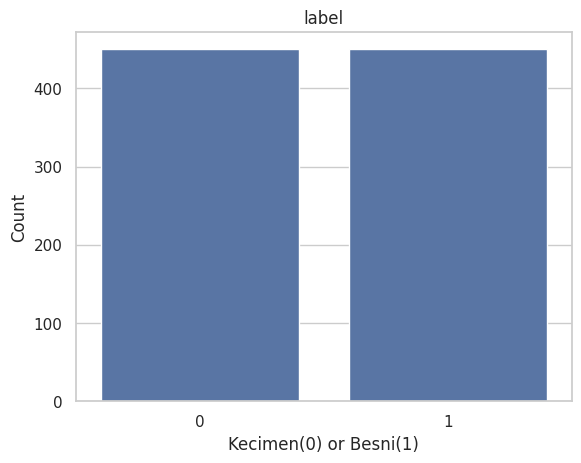

In [58]:
# label count 확인 by graph
sns.countplot(data=df, x='Class')
plt.xlabel('Kecimen(0) or Besni(1)')
plt.ylabel('Count')
plt.title('label')
plt.show()

In [59]:
# label count 확인 by numeric
df['Class'].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

In [60]:
# missing value 확인
# .info()는 non-missing value의 수를 제공하기 때문에 덜 직관적임
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

[pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

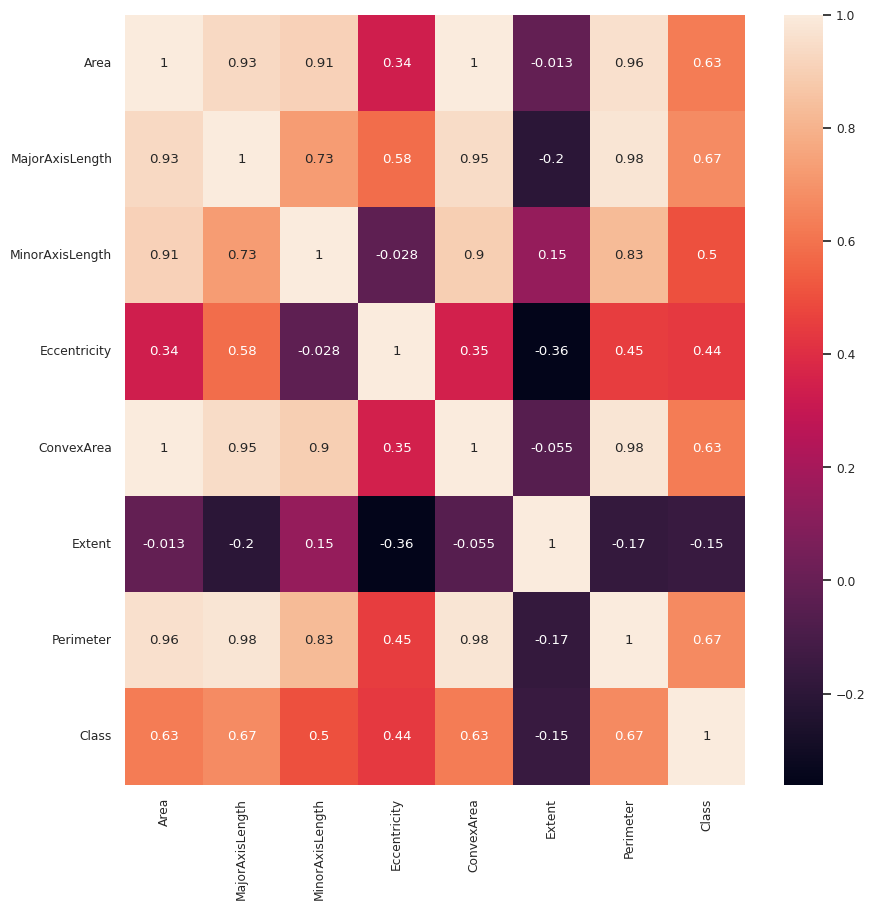

In [27]:
# correlation 확인하기 - sol1.
# numerical하게 파악 가능함, missing value는 파악 불가

# if corr >= 0.3, correlated and if corr >= 0.7, high correlated
df_corr = df.corr()

# hitmap ploting by Seaborn library
# The 'annot' parameter is used to add annotations to the cells of a heatmap.
# The 'cbar' parameter controls the display of the color bar(position=right) in plots like heatmaps.
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=True)
plt.show()

# 'Class'는 'Extent'를 제외한 모든 features와 correlated

In [ ]:
# copy해서 다음 cell에서 사용
df.columns

<Figure size 1000x700 with 0 Axes>

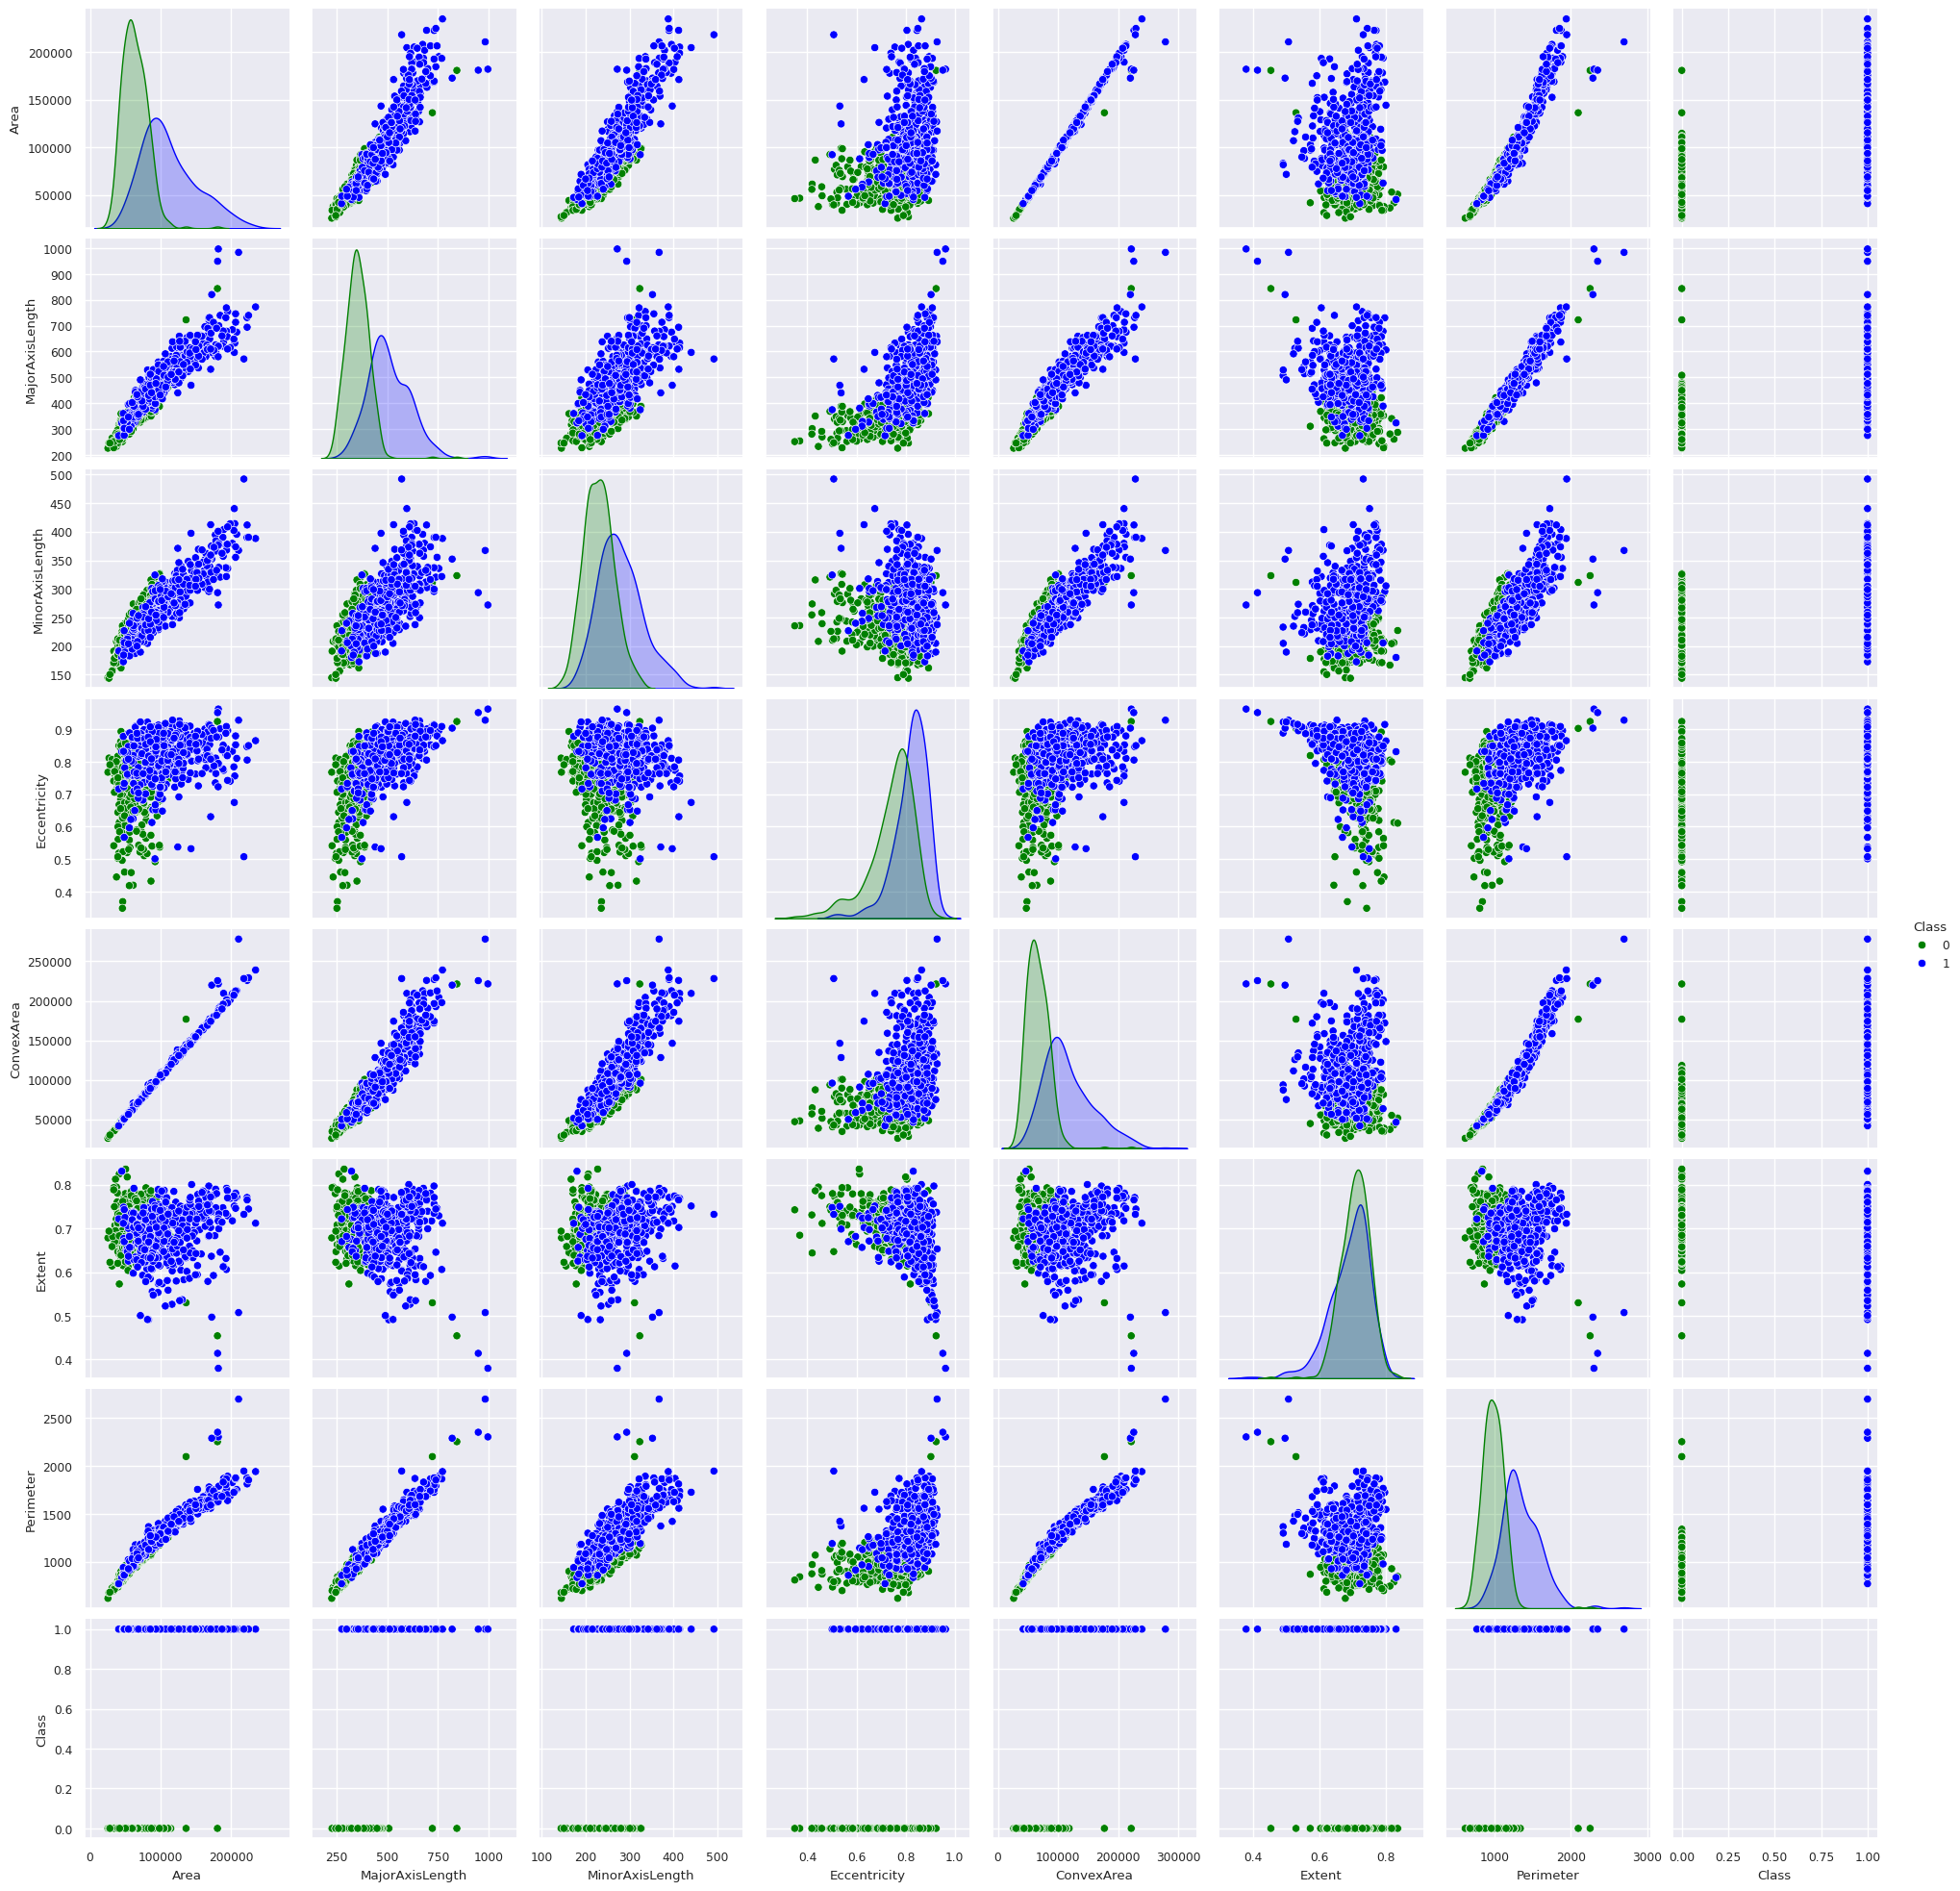

In [34]:
# correlation 확인하기 - sol2.
# scatter plot 또는 others로 확인 가능, missing value도 확인 가능
plt.figure(figsize=(10, 7))
sns.pairplot(df,
             vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
                   'ConvexArea', 'Extent', 'Perimeter', 'Class'],
             hue='Class', # 'Class'의 value에 따라 구분하여 plotting
             palette = {0: 'green', 1: 'blue'}) # hue에서의 색상 구분 지정
plt.show()

# negative class sample 중에서 outliar로 추정되는 sample 2개가 확인됨

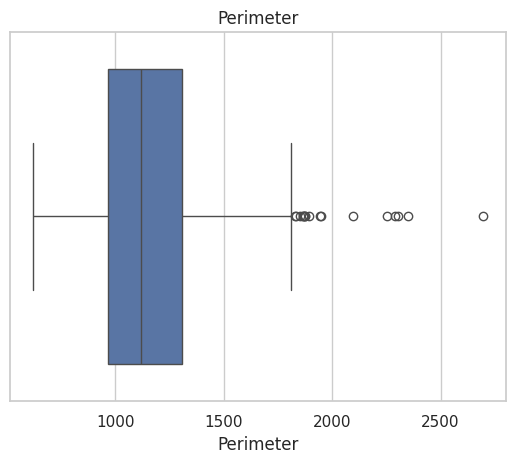

In [44]:
# 특정 column의 range 확인 및 outliar 확인
sns.set_theme(style='whitegrid')
sns.boxplot(x='Perimeter', data=df)
plt.title('Perimeter')
plt.show()

<ipython-input-45-84d556b67250>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


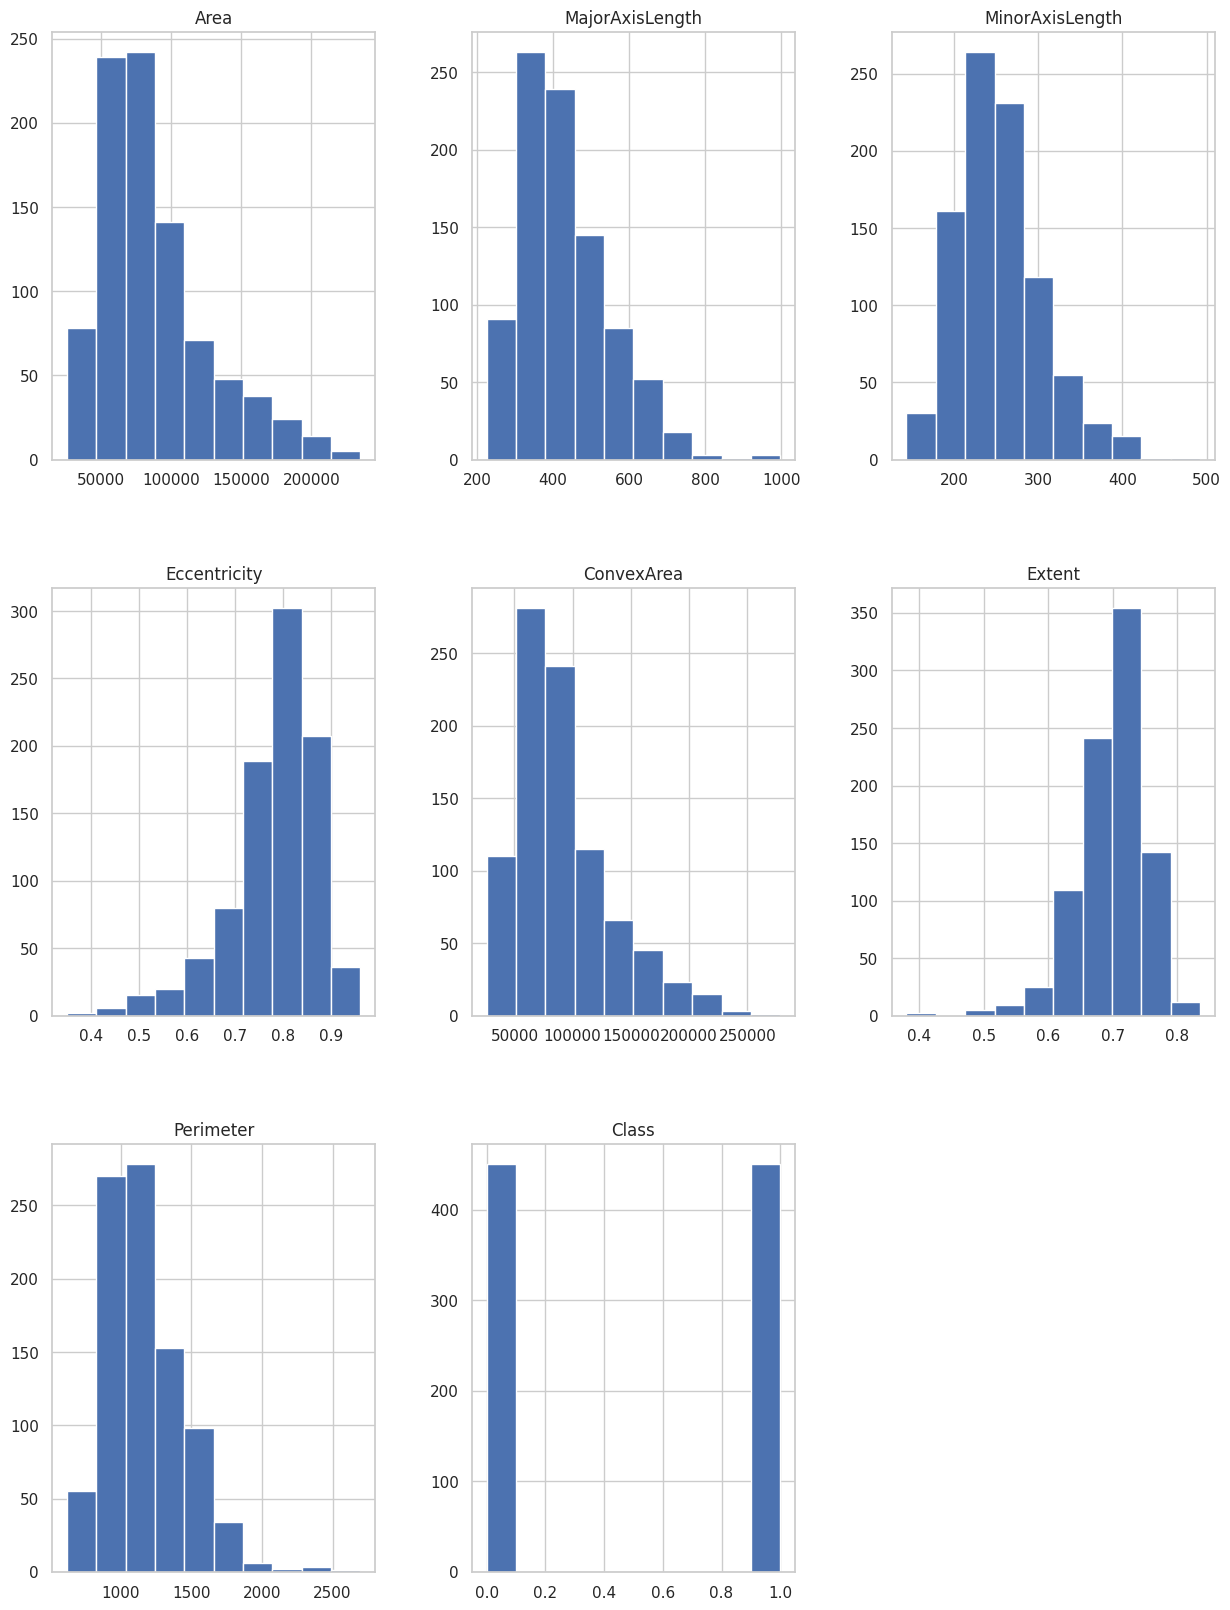

In [45]:
# 각 column별 histgram 확인
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

# 1. PyTorch

In [46]:
import torch
import torch.nn as nn # neural network
import torch.optim as optim # optimizer

In [62]:
# convert dataframe to numpy
X = df.drop('Class', axis=1).to_numpy()
y = df['Class'].to_numpy()

print(X[:5])
print(y[:5])

[[8.75240000e+04 4.42246011e+02 2.53291155e+02 8.19738392e-01
  9.05460000e+04 7.58650579e-01 1.18404000e+03]
 [7.51660000e+04 4.06690687e+02 2.43032436e+02 8.01805234e-01
  7.87890000e+04 6.84129570e-01 1.12178600e+03]
 [9.08560000e+04 4.42267048e+02 2.66328318e+02 7.98353619e-01
  9.37170000e+04 6.37612812e-01 1.20857500e+03]
 [4.59280000e+04 2.86540559e+02 2.08760042e+02 6.84989217e-01
  4.73360000e+04 6.99599385e-01 8.44162000e+02]
 [7.94080000e+04 3.52190770e+02 2.90827533e+02 5.64011330e-01
  8.14630000e+04 7.92771926e-01 1.07325100e+03]]
[0 0 0 0 0]


In [61]:
print(X.shape, y.shape)

(900, 7) (900,)


In [64]:
# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# test_size parameter 적용 여부 확인
print(X_train.shape, X_test.shape)
# stratify=y parameter 적용 여부 확인
print(np.bincount(y_train), np.bincount(y_test))

(720, 7) (180, 7)
[360 360] [90 90]


In [65]:
# Standardization by Z-score nomarlization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:3])
print(X_test[:3])

[[ 0.40568003  0.16646486  0.81599915 -0.30473865  0.38286775  0.50354256
   0.2968778 ]
 [-0.67383971 -0.57820495 -0.68655872  0.15967924 -0.63225518  0.45075446
  -0.40819794]
 [-1.57344779 -1.7432463  -2.17110798 -0.16208479 -1.5660239  -0.3713528
  -1.96292957]]
[[-0.56962532 -0.25096022 -0.88821556  0.80254606 -0.58690009 -1.4826051
  -0.50180521]
 [-0.76834932 -0.97968876 -0.41369892 -1.23109554 -0.78627252  0.25668641
  -0.94014856]
 [-1.07051631 -1.45526256 -0.58279382 -3.2081621  -1.0643396   0.77586125
  -1.27266835]]
